In [1]:
!sudo apt install python3.7
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.7 2
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.1 1
!python --version


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib mailcap mime-support
  python3.7-minimal
Suggested packages:
  python3.7-venv binfmt-support
The following NEW packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib mailcap mime-support python3.7
  python3.7-minimal
0 upgraded, 6 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,698 kB of archives.
After this operation, 17.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.7-minimal amd64 3.7.17-1+jammy1 [608 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.7-minima

In [2]:
!git clone https://github.com/zhenruiliao/tension.git tension
!pip install -e tension

Cloning into 'tension'...
remote: Enumerating objects: 679, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 679 (delta 77), reused 91 (delta 50), pack-reused 525
Receiving objects: 100% (679/679), 14.03 MiB | 16.61 MiB/s, done.
Resolving deltas: 100% (385/385), done.
Obtaining file:///content/tension
  Preparing metadata (setup.py) ... done
  Running setup.py develop for tension


In [3]:
!pip install tensorflow==2.8.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 92.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 58.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing instal

In [4]:
try:
  import tension
except ImportError:
  !git clone https://github.com/zhenruiliao/tension.git tension
  !pip install -e tension
  print('Stopping RUNTIME! Please run again.')

In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
from tension.spiking import SpikingNNModel, Theta

In [2]:
import time
import numpy as np
import tensorflow as tf
import keras
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print(tf.__version__)

TensorFlow version: 2.8.1
Keras version: 2.8.0
2.8.1


In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
sns.set(context = 'talk', style = 'ticks')

In [4]:
import tensorflow as tf


In [5]:
from google.colab import drive
drive.mount("/content/drive")
import os
path="/content/drive/My Drive/AMP"
os.chdir(path)
os.listdir(path)  ####If not using in Colab, you can delete this.

Mounted at /content/drive


['deterministic.eps',
 'Transition time.pdf',
 'lorenz.npy',
 'spikinglorenz',
 'FIG3(b).npy',
 'atra.pdf',
 'datafordistribution.npy',
 'tension',
 'spiking15000proteindata.npy',
 'spiking7500proteindata.npy',
 'predictedproteindata.npy',
 'Transition_up time.pdf',
 'Transition_down time.pdf',
 'fullforcetrainingdata.npy',
 'stafflearning.pdf',
 'feike.pdf',
 'RCdoublewell100-200.npy',
 'fflearning.pdf',
 'fflearning_and_RC.pdf',
 'bistable.pdf',
 'realdata.npy',
 'Win.npy',
 'WoutPara.npy',
 'rFinalTrainTotal.npy',
 'Wxi.npy',
 'Wb.npy',
 'A.npy',
 'deterministic.pdf',
 'output1.npy',
 'output8.npy',
 'output4.npy',
 'output6.npy',
 'output7.npy',
 'data.npy',
 'output2.npy',
 'output9.npy',
 'output3.npy',
 'output5.npy',
 'realtime.npy',
 'predicttime.npy']

In [6]:
#Load the protein array.
protein = np.load("/content/drive/My Drive/AMP/datafordistribution.npy")

#Select the first 100,000 + Ttrain elements (6000/7500/15000/25000) and convert them into a column vector.
protein_selected = protein[:107500].reshape(-1, 1)
print(np.shape(protein_selected))

(107500, 1)


In [7]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15
EXTRA_SIZE = 24

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [18]:
N = 5000 # number of neurons
T = 1075 # total time  Total data points = total time / dt.
dt = 0.01 # time step
v_reset = -np.pi # reset voltage
v_peak = np.pi # peak voltage
tau_decay = 0.02; # decay time constant
tau_rise = 0.002; # rise time constant
tau_syn = 0.02 # synaptic time constant
alpha = dt # gain on P matrix at initialization
Q = 10**4 # scales the feedback kernel
G = 15 # scales the static recurrent kernel
I_bias = 0 # bias current

t_end_train = round(75/dt) # time step to stop training

p_recurr = 0.1 # (1 - p_recurr) of recurrent weights are randomly set to 0
g = 1 # gain parameter controlling network chaos

print('Total number of time steps: ', T/dt)

Total number of time steps:  107500.0


In [9]:
# white noise
num_steps = round(T/dt)
dimensions = 1
a = 0;    b = 5;    c=0;    epsilon=0.3

xtime = np.linspace(0, T,num_steps)
u = np.zeros((dimensions, num_steps))
q = np.zeros((dimensions, num_steps))
u[0,0]=1.5
for i in range(num_steps-1):
   u[0,i + 1] = u[0,i] + dt * (-b*(-u[0,i]+u[0,i]**3+c))
   q[0,i] =  np.sqrt(dt*2*epsilon*b) * np.random.randn()
   u[0,i+1]=u[0,i+1]+q[0,i]
print(np.shape(u))
u=np.reshape(u,(num_steps,1))

(1, 200000)


In [10]:
# target = u  ## for a 1D bistable system with white noise
target = protein_selected # for the protein folding data
target = tf.cast(target, tf.float32)
input = tf.zeros(target.shape) # set a dummy input of all zeros

print(target.shape)
# m = target.shape[1]
m=1

(107500, 1)


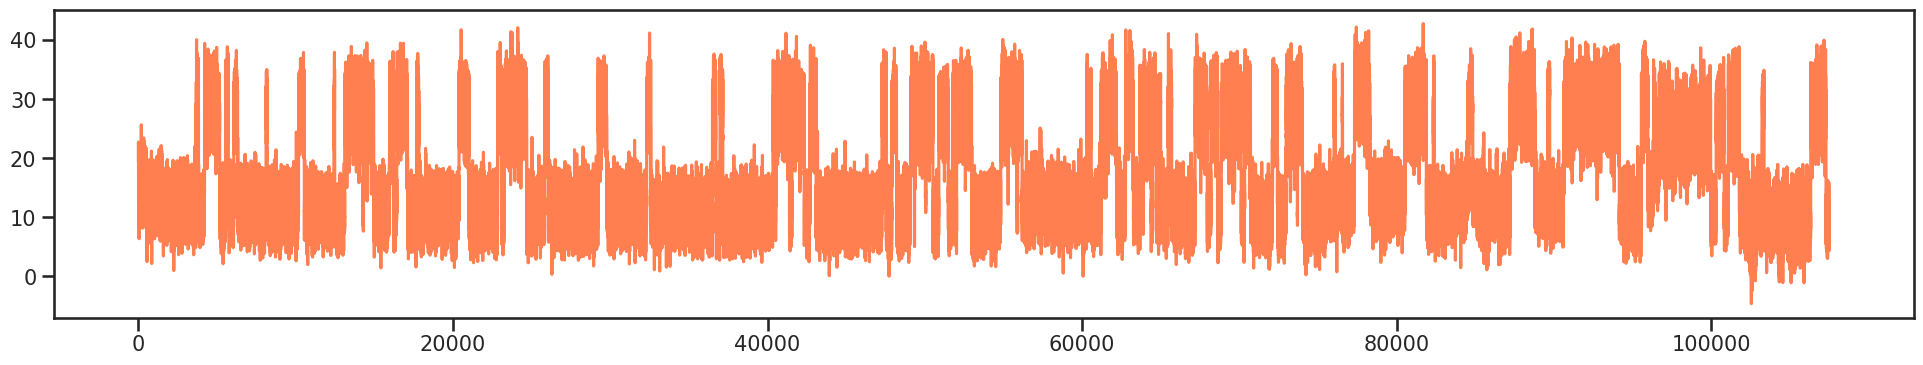

In [11]:
plt.figure(figsize = (24,4))
plt.plot(target[:,0],color="coral")
###plot the data with Lorenz noise

In [12]:
class CustomSpikingNNModel(SpikingNNModel):
    def __init__(self, step=10, **kwargs):  # step: update interval
        super().__init__(**kwargs)
        self.num_step = tf.Variable(0., trainable=False)
        self.step = step

    def update_kernel_condition(self):
        self.num_step.assign_add(1.0, read_value=False)
        return self.num_step % self.step == 0

In [13]:
# Tracks the network output during training
class OutputTracking(tf.keras.callbacks.Callback):
    def __init__(self, timesteps, output_size, output_state_idx=-1):
        self.tracking_arr = np.zeros((timesteps, output_size))
        self.output_state_idx = output_state_idx

    def on_batch_end(self, batch, logs=None):
        self.tracking_arr[batch] = self.model.force_layer.states[self.output_state_idx][0]

In [ ]:
!python -V

Python 3.10.12


In [14]:
# 训练
%%time
tf.random.set_seed(0)

output_tracking = OutputTracking(timesteps=input[:t_end_train].shape[0],
                                 output_size=m,
                                 output_state_idx=-1)

Theta_layer = Theta(units=N,
                    output_size=m,
                    dt=dt,
                    tau_decay=tau_decay,
                    tau_rise=tau_rise,
                    tau_syn=tau_syn,
                    v_peak=v_peak,
                    v_reset=v_reset,
                    I_bias=I_bias,
                    G=G,
                    Q=Q,
                    p_recurr=p_recurr,
                    g=g,
                    seed=0)

spikingmodel = CustomSpikingNNModel(force_layer=Theta_layer,
                                    alpha_P=alpha,
                                    step=10) # step: update interval
spikingmodel.compile(metrics=["mae" ])
history = spikingmodel.fit(x=input[:t_end_train],
                           y=target[:t_end_train],
                           epochs=1,
                           callbacks=[output_tracking])

10000/10000 [==============================] - 261s 26ms/step - mae: 8.7062
CPU times: user 4min 8s, sys: 1min 15s, total: 5min 23s
Wall time: 4min 21s


In [15]:
#预测
%%time
inference = spikingmodel.predict(input[t_end_train:])

CPU times: user 8min 16s, sys: 22 s, total: 8min 38s
Wall time: 6min


In [16]:
training_inference = np.concatenate([output_tracking.tracking_arr, inference])

(0.0, 200.0)

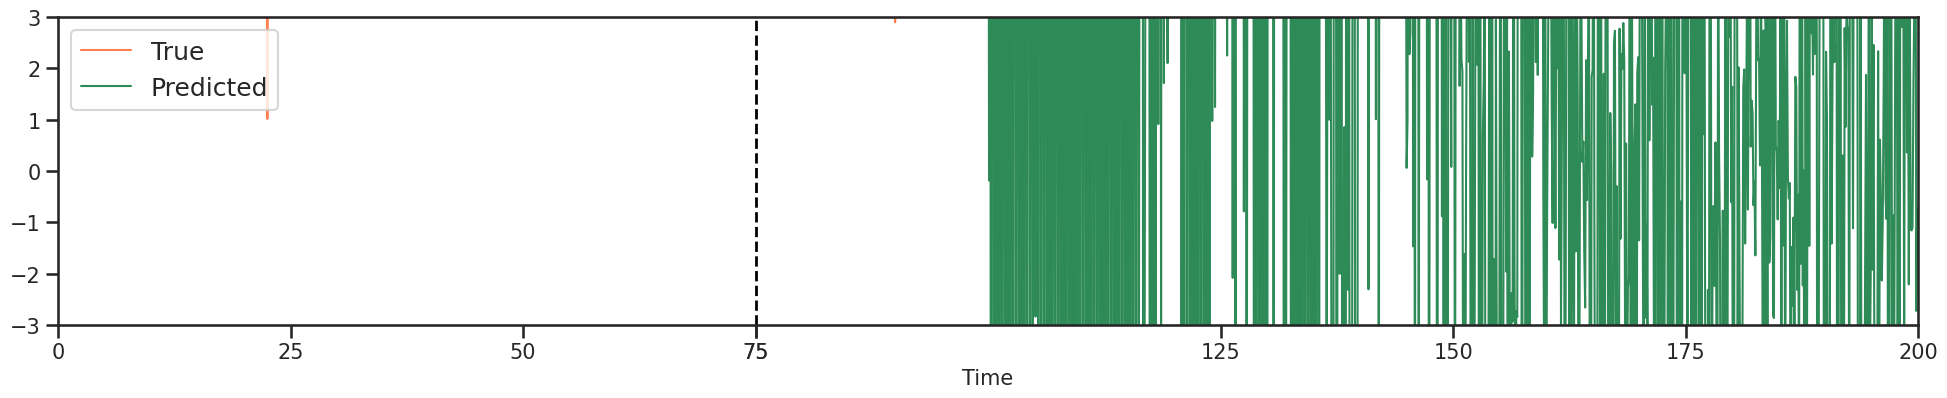

In [19]:
###plot for 1D white noise
x = np.arange(0, T, dt)

fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(24, 4))

# Since we plot every 10 points, we need to calculate the new x-axis values.
new_x_values = x[::10]
start_index = int(100 / dt)
end_index = int(200 / dt)
# Plot every 10 points.
ax1.plot(new_x_values, target[::10, 0], color='coral', label='True', linewidth=1.5)

# 绘制预测数据，也是每隔10个点画一次
ax1.plot(x[start_index:end_index:10], training_inference[start_index:end_index:10, 0], color='seagreen', label='Predicted', linewidth=1.5, linestyle="-")
#ax1.set_xticks([0, t_end_train*dt,250, 500, 750, 1000,1250,1500,1750,2000])
ax1.set_xticks([0,25,50,75, t_end_train*dt,125,150,175,200])
ax1.axvline(x=t_end_train*dt, color='black', linestyle='dashed', linewidth=2)


ax1.set_xlabel('Time')
ax1.legend(loc='upper left', prop={'size': 18}, title_fontsize=18)

step_value = 10 #
plt.ylim(-3, 3)
plt.xlim(0, 200)
##replace it to your path.
# plt.savefig(f"/content/drive/My Drive/AMP/spikinglorenz/step={step_value}.pdf", bbox_inches='tight')
# plt.savefig(f"/content/drive/My Drive/AMP/spikinglorenz/proteinstep={step_value}.pdf", bbox_inches='tight')

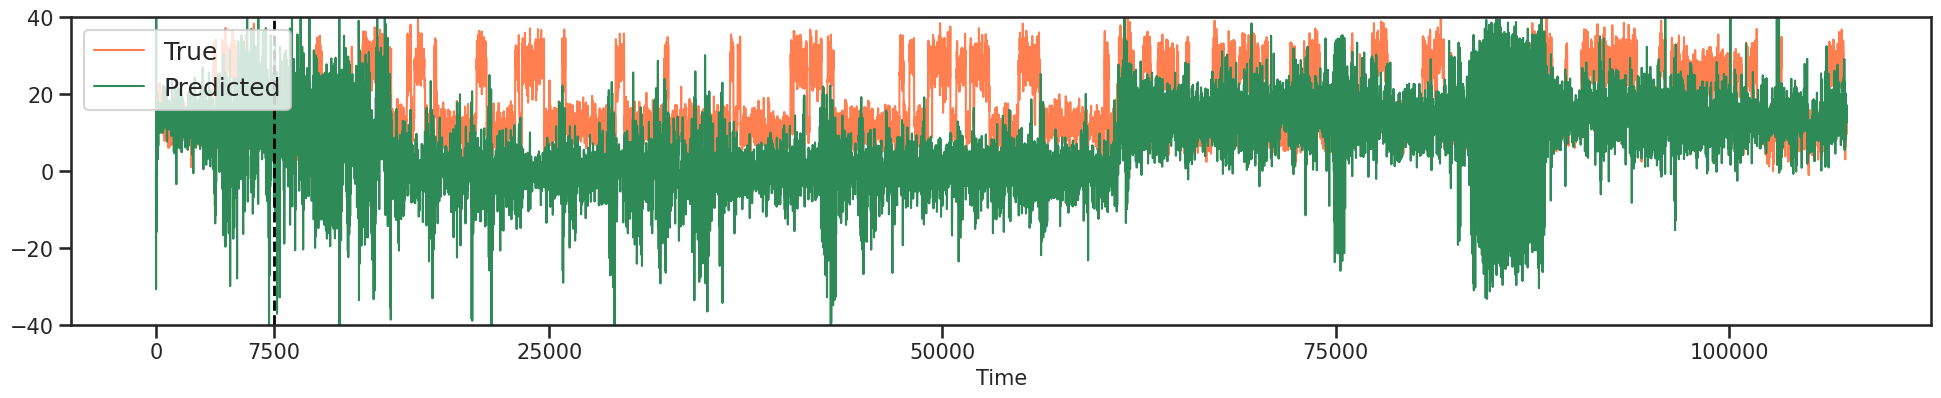

In [20]:
#####Plot for predicting protein

x = np.arange(0, T/dt, 1)

fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(24, 4))


new_x_values = x[::10]


ax1.plot(new_x_values, target[::10, 0], color='coral', label='True', linewidth=1.5)


ax1.plot(new_x_values, training_inference[::10, 0], color='seagreen', label='Predicted', linewidth=1.5, linestyle="-")
ax1.set_xticks([0, t_end_train,25000, 50000, 75000, 100000])
ax1.axvline(x=t_end_train, color='black', linestyle='dashed', linewidth=2)


ax1.set_xlabel('Time')
ax1.legend(loc='upper left', prop={'size': 18}, title_fontsize=18)

train_value = 6000 #
plt.ylim(-40, 40)
### replace with your path
# plt.xlim(0, 100000)
# plt.savefig(f"/content/drive/My Drive/AMP/spikinglorenz/step={step_value}.pdf", bbox_inches='tight')
#plt.savefig(f"/content/drive/My Drive/AMP/spikinglorenz/proteinstep={train_value}.pdf", bbox_inches='tight')

In [ ]:
from matplotlib.ticker import FixedLocator, FixedFormatter,FuncFormatter,FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter, ScalarFormatter, AutoMinorLocator

def distribution(data,T_times,T_interval):  #To evaluate the transition time and number
    '''
    Change the time series to three numbers:
        -1 if <0
        0 if =0
        1 if >0
    and put these results in sign,
    '''
    xshape=np.shape(data)[0]
    yshape=np.shape(data)[1]
    count=0
    index_up=0
    index_down=0
    length=max(xshape,yshape)
    diff=[]
    position=[]
    if yshape > xshape:
        data = data.T
    sign=np.sign(data)

    '''
    Consider where the symbol changed, and put these results in position,
    when changed, transition might happen.
    '''
    for i in range (length-1):
        diff.append(sign[i+1,0]-sign[i,0])
        if diff[i]!=0:
            position.append(i)

    '''
    Initialization
    '''
    for i in range (np.shape(sign)[0]):
        if sign[i,0]!=0:
            state=sign[i,0]
            index_up=i
            index_down=i
            break

    '''
    Evaluation
    '''
    for i in range (len(position)):
        if i!=len(position)-1:
            if state<0:
                if diff[position[i]]>0:
                    if np.max(data[position[i]:position[i+1],0])>=1 :
                        peroid=data[position[i]:position[i+1],0]
                        index_up=list(peroid>=1).index(True) + position[i]
                        T_interval.append(index_up-index_down)
                        state=1
                        count+=1

            elif state>0:
                if diff[position[i]]<0:
                    if np.min(data[position[i]:position[i+1],0])<=-1 :
                        peroid=data[position[i]:position[i+1],0]
                        index_down=list(peroid<=-1).index(True) + position[i]
                        T_interval.append(index_down-index_up)
                        state=-1
                        count+=1
        else:
            if state<0:
                if diff[position[i]]>0:
                    if np.max(data[position[i]:,0])>=1 :
                        peroid=data[position[i]:,0]
                        index_up=list(peroid>=1).index(True) + position[i]
                        T_interval.append(index_up-index_down)
                        state=1
                        count+=1
            elif state>0:
                if diff[position[i]]<0:
                    if np.min(data[position[i]:,0])<=-1 :
                        peroid=data[position[i]:,0]
                        index_down=list(peroid<=-1).index(True) + position[i]
                        T_interval.append(index_down-index_up)
                        state=-1
                        count+=1
    T_times.append(count)


def draw_distribution(a,b,title,xlable,bins_interval=2,margin=1):  #To draw the PDF of evaluation between test and predicted data
    '''
    This part is to draw the PDF between a and b
    '''
    data=[a,b]
    left = min(np.min(a),np.min(b))
    right = max(np.max(a),np.max(b))
    bins= np.arange(math.floor(left), math.ceil(right), bins_interval)
    plt.xlim(math.floor(left) - margin, math.ceil(right) + margin)
    plt.xlim(0,25)
    plt.xlabel(xlable)
    plt.ylabel('Frequency')
    plt.hist(data, bins=bins, density=True, color=['coral','seagreen'])

    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))  #纵坐标2位小数
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True, nbins=6)) #横坐标刻度数5
    ax.yaxis.set_major_locator(FixedLocator(ax.get_yticks()))
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5)) #纵坐标刻度数6

    if xlable == 'Number' :
        plt.legend(['True: '+str(round(np.mean(a),2)),'Predicted: '+str(round(np.mean(b),2))],title='Average number of transitions',fontsize=13.5 ,loc='upper right')
    else:
        plt.legend(['True: '+str(round(np.mean(a),2)),'Predicted: '+str(round(np.mean(b),2))],prop={'size': 18},title_fontsize= 18,title='Average transition time',loc='upper right')
        # plt.rcParams.update({'font.size':15})
        plt.savefig(f"/content/drive/My Drive/AMP/spikinglorenz/statisticalstep={step_value}.pdf", bbox_inches='tight')
    plt.savefig(title + '.pdf',bbox_inches = 'tight')
    plt.show()

In [ ]:
a=[]
b=[]
au=[]
bu=[]
BU=[]
B=[]
import math
c=training_inference[:,0]

c=np.reshape(c,(1,num_steps))
distribution(c,a,b)
distribution(u,au,bu)
step_value=50
BU=[x*0.01 for x in bu]
B=[x*0.01 for x in b]
# draw_distribution(bu,b,"feike",'Time')  #
draw_distribution(BU,B,"feike",'Time')
# draw_distribution(au,a,"zongky",'Number') #

NameError: name 'training_inference' is not defined

In [ ]:
###### Compute statistics for protein

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as ticker
from matplotlib.ticker import FixedLocator, FixedFormatter,FuncFormatter
from matplotlib.ticker import StrMethodFormatter, ScalarFormatter, AutoMinorLocator
plt.rc('font',size=15)

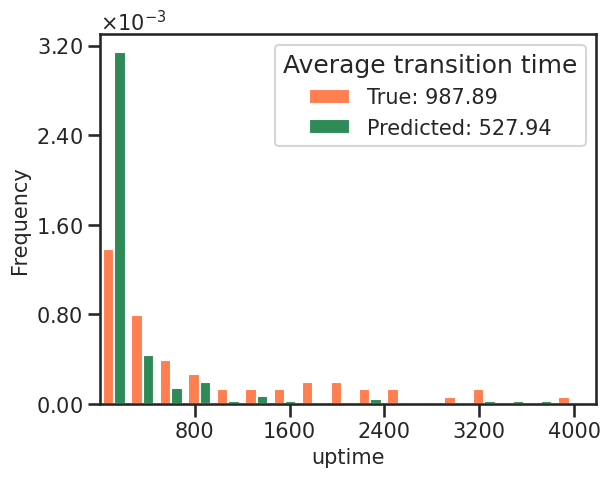

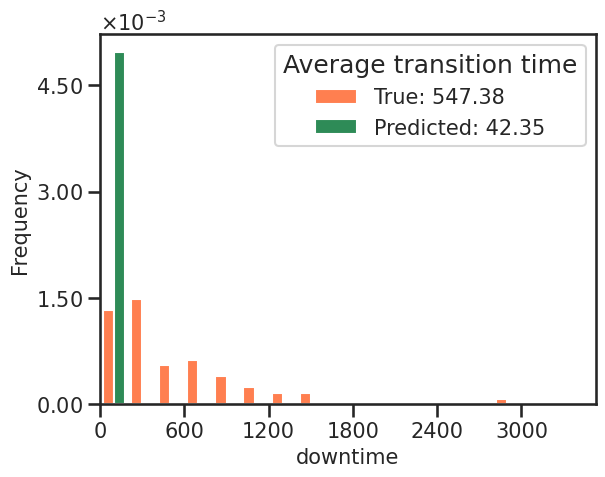

In [22]:
ruptime=[]
rdowntime=[]
puptime=[]
pdowntime=[]
rupnumber=0
rdownnumber=0
pupnumber=0
pdownnumber=0

point=20
upstate=28
downstate=12
Exp=0

def Fsign(data):
    return np.where(data>point,1,np.where(data<point,-1,0))


def distribution(data,uptime,downtime):
    upnumber=0
    downnumber=0
    xshape=np.shape(data)[0]
    yshape=np.shape(data)[1]
    index_up=0
    index_down=0
    length=max(xshape,yshape)
    diff=[]
    position=[]
    if yshape > xshape:
        data = data.T
    sign=Fsign(data)

    for i in range (length-1):
        diff.append(sign[i+1,0]-sign[i,0])
        if diff[i]!=0:
            position.append(i)

    for i in range (np.shape(sign)[0]):
        if sign[i,0]!=0:
            state=sign[i,0]
            index_up=i
            index_down=i
            break

    for i in range (len(position)):
        if i!=len(position)-1:
            if state<0:
                if diff[position[i]]>0:
                    if np.max(data[position[i]:position[i+1],0])>=upstate :
                        peroid=data[position[i]:position[i+1],0]
                        index_up=list(peroid>=upstate).index(True) + position[i]
                        uptime.append(index_up-index_down)
                        state=1
                        upnumber = upnumber+1


            elif state>0:
                if diff[position[i]]<0:
                    if np.min(data[position[i]:position[i+1],0])<=downstate :
                        peroid=data[position[i]:position[i+1],0]
                        index_down=list(peroid<=downstate).index(True) + position[i]
                        downtime.append(index_down-index_up)
                        state=-1
                        downnumber = downnumber+1

        else:
            if state<0:
                if diff[position[i]]>0:
                    if np.max(data[position[i]:,0])>=upstate :
                        peroid=data[position[i]:,0]
                        index_up=list(peroid>=upstate).index(True) + position[i]
                        uptime.append(index_up-index_down)
                        state=1
                        upnumber = upnumber+1

            elif state>0:
                if diff[position[i]]<0:
                    if np.min(data[position[i]:,0])<=downstate :
                        peroid=data[position[i]:,0]
                        index_down=list(peroid<=downstate).index(True) + position[i]
                        downtime.append(index_down-index_up)
                        state=-1
                        downnumber = downnumber+1
    return upnumber,downnumber

def sci_formatter(x,pos):
    coeff, exp = "{:e}".format(x).split('e')
    coeff = float(coeff)
    if int(exp) < int(Exp):
        coeff = coeff /10
    return r"${:.2f}$".format(coeff)

def draw_distribution(a,b,anumber,bnumber,title,xlable,bins_interval=100,margin=1):
    data=[a,b]
    left = min(np.min(a),np.min(b))
    right = np.max(a)
    bins= np.arange(math.floor(left), math.ceil(right), bins_interval)
    plt.xlim(math.floor(left) - margin, math.ceil(right) + margin)
    plt.xlabel(xlable)
    plt.ylabel('Frequency')
    hist,Bins,_ = plt.hist(data, bins=bins, density=True, color=['coral','seagreen'])
    plt.legend(['True: '+str(round(np.mean(a),2)),'Predicted: '+str(round(np.mean(b),2))],
                title='Average transition time',loc='upper right',prop={'size': 15})
    # plt.text(0.5, 1.03, '$T_{train}=25000$', transform=plt.gca().transAxes, ha='center',size=18)
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True, nbins=6))
    ax.yaxis.set_major_locator(FixedLocator(ax.get_yticks()))
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

    global Exp
    _, Exp = "{:e}".format(np.max(hist)).split('e')

    formatter = FuncFormatter(sci_formatter)
    ax.yaxis.set_major_formatter(formatter)
    plt.annotate(r"$\times 10^{" + str(int(Exp)) + "}$",
             xy=(0, 1), xycoords='axes fraction',
             fontsize=ax.yaxis.get_major_ticks()[0].label1.get_fontsize(),
             verticalalignment='bottom')

    plt.savefig('/content/drive/My Drive/AMP/'+title + '.pdf',bbox_inches = 'tight') # replace with your path
    plt.show()

# Realdata=np.load('/content/drive/My Drive/sindyprotein/datafordistribution.npy')
# realdata=Realdata[7500:107500]
# realdata=realdata.reshape(1,-1)
# predata=np.load('/content/drive/My Drive/sindyprotein/generatedata.npy')
# predata=predata.reshape(1,-1)

####
Predata=training_inference[7500:107500,0]
np.save('/content/drive/My Drive/AMP/predictedproteindata.npy',Predata) ##3 replace with your path
Realdata= target[7500:107500,0]

predata = np.reshape(Predata, (1, -1))
realdata = np.reshape(Realdata, (1, -1))


rupnumber,rdownnumber=distribution(realdata,ruptime,rdowntime)
pupnumber,pdownnumber=distribution(predata,puptime,pdowntime)

draw_distribution(ruptime,puptime,rupnumber,pupnumber,'Transition_up time', 'uptime',bins_interval=240,margin=1)# left is true
draw_distribution(rdowntime,pdowntime,rdownnumber,pdownnumber,'Transition_down time', 'downtime',bins_interval=200,margin=1)

In [23]:
from scipy.stats import entropy

#Compute statistics for protein and calculate KL divergence

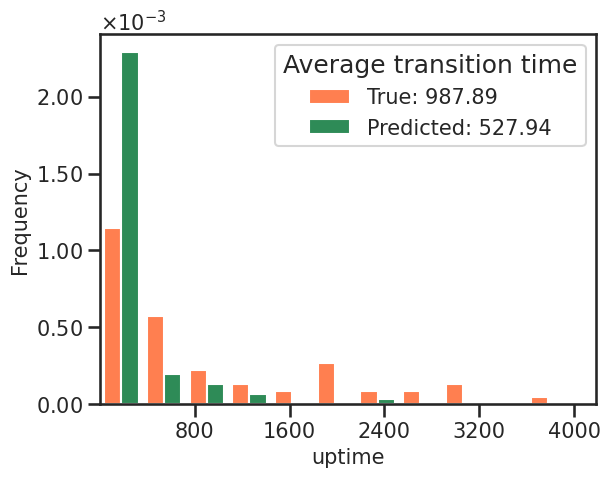

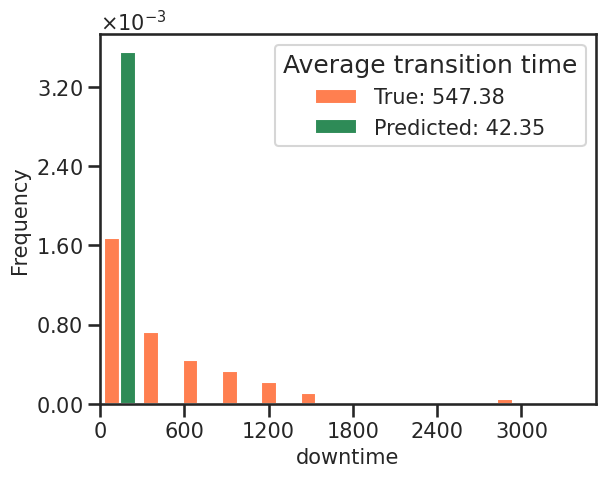

kl_divergence_down= 6.206048292253532


In [26]:
ruptime=[]
rdowntime=[]
puptime=[]
pdowntime=[]
rupnumber=0
rdownnumber=0
pupnumber=0
pdownnumber=0

point=20
upstate=28
downstate=12
Exp=0

def Fsign(data):
    return np.where(data>point,1,np.where(data<point,-1,0))


def distribution(data,uptime,downtime):
    upnumber=0
    downnumber=0
    xshape=np.shape(data)[0]
    yshape=np.shape(data)[1]
    index_up=0
    index_down=0
    length=max(xshape,yshape)
    diff=[]
    position=[]
    if yshape > xshape:
        data = data.T
    sign=Fsign(data)

    for i in range (length-1):
        diff.append(sign[i+1,0]-sign[i,0])
        if diff[i]!=0:
            position.append(i)

    for i in range (np.shape(sign)[0]):
        if sign[i,0]!=0:
            state=sign[i,0]
            index_up=i
            index_down=i
            break

    for i in range (len(position)):
        if i!=len(position)-1:
            if state<0:
                if diff[position[i]]>0:
                    if np.max(data[position[i]:position[i+1],0])>=upstate :
                        peroid=data[position[i]:position[i+1],0]
                        index_up=list(peroid>=upstate).index(True) + position[i]
                        uptime.append(index_up-index_down)
                        state=1
                        upnumber = upnumber+1


            elif state>0:
                if diff[position[i]]<0:
                    if np.min(data[position[i]:position[i+1],0])<=downstate :
                        peroid=data[position[i]:position[i+1],0]
                        index_down=list(peroid<=downstate).index(True) + position[i]
                        downtime.append(index_down-index_up)
                        state=-1
                        downnumber = downnumber+1

        else:
            if state<0:
                if diff[position[i]]>0:
                    if np.max(data[position[i]:,0])>=upstate :
                        peroid=data[position[i]:,0]
                        index_up=list(peroid>=upstate).index(True) + position[i]
                        uptime.append(index_up-index_down)
                        state=1
                        upnumber = upnumber+1

            elif state>0:
                if diff[position[i]]<0:
                    if np.min(data[position[i]:,0])<=downstate :
                        peroid=data[position[i]:,0]
                        index_down=list(peroid<=downstate).index(True) + position[i]
                        downtime.append(index_down-index_up)
                        state=-1
                        downnumber = downnumber+1
    return upnumber,downnumber

def sci_formatter(x,pos):
    coeff, exp = "{:e}".format(x).split('e')
    coeff = float(coeff)
    if int(exp) < int(Exp):
        coeff = coeff /10
    return r"${:.2f}$".format(coeff)

def draw_distribution(a,b,anumber,bnumber,title,xlable,bins_interval=100,margin=1):
    data=[a,b]
    left = min(np.min(a),np.min(b))
    right = np.max(a)
    bins= np.arange(math.floor(left), math.ceil(right), bins_interval)
    plt.xlim(math.floor(left) - margin, math.ceil(right) + margin)
    plt.xlabel(xlable)
    plt.ylabel('Frequency')
    hist,Bins,_ = plt.hist(data, bins=bins, density=True, color=['coral','seagreen'])
    plt.legend(['True: '+str(round(np.mean(a),2)),'Predicted: '+str(round(np.mean(b),2))],
                title='Average transition time',loc='upper right',prop={'size': 15})
    # plt.text(0.5, 1.03, '$T_{train}=25000$', transform=plt.gca().transAxes, ha='center',size=18)
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True, nbins=6))
    ax.yaxis.set_major_locator(FixedLocator(ax.get_yticks()))
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

    global Exp
    _, Exp = "{:e}".format(np.max(hist)).split('e')

    formatter = FuncFormatter(sci_formatter)
    ax.yaxis.set_major_formatter(formatter)
    plt.annotate(r"$\times 10^{" + str(int(Exp)) + "}$",
             xy=(0, 1), xycoords='axes fraction',
             fontsize=ax.yaxis.get_major_ticks()[0].label1.get_fontsize(),
             verticalalignment='bottom')

    plt.savefig('/content/drive/My Drive/AMP/'+title + '.pdf',bbox_inches = 'tight')
    plt.show()
    return hist[0], hist[1]

def calculate_kl_divergence(true_hist, predicted_hist):
    true_hist = np.asarray(true_hist)
    predicted_hist = np.asarray(predicted_hist)

    # 防止除零错误，给预测直方图数据加上一个小值
    predicted_hist += 1e-10

    return entropy(true_hist, predicted_hist)

####
Predata=training_inference[7500:107500,0] # 7500/6000/15000/25000....
np.save('/content/drive/My Drive/AMP/spiking7500proteindata.npy',Predata)  ##replace with your path
Realdata= target[7500:107500,0]

predata = np.reshape(Predata, (1, -1))
realdata = np.reshape(Realdata, (1, -1))


rupnumber,rdownnumber=distribution(realdata,ruptime,rdowntime)
pupnumber,pdownnumber=distribution(predata,puptime,pdowntime)

true_hist_up, pred_hist_up = draw_distribution(ruptime, puptime, None, None, 'Transition_up time', 'uptime', bins_interval=360, margin=1)
true_hist_down, pred_hist_down = draw_distribution(rdowntime, pdowntime, None, None, 'Transition_down time', 'downtime', bins_interval=280, margin=1)

kl_divergence_up = calculate_kl_divergence(true_hist_up, pred_hist_up)
kl_divergence_down = calculate_kl_divergence(true_hist_down, pred_hist_down)
print("kl_divergence_down=",kl_divergence_down)